<a href="https://colab.research.google.com/github/prasannaml/NLP-PROJECTS/blob/test/Gemini_AI_prompting_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip3 install --upgrade --user google-cloud-aiplatform

In [1]:
import IPython
#To restart the kernel before use.

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

In [1]:
import sys

# Additional authentication is required for Google Colab
if "google.colab" in sys.modules:
    # Authenticate user to Google Cloud
    from google.colab import auth

    auth.authenticate_user()

In [2]:



if "google.colab" in sys.modules:
    # Define project information
    PROJECT_ID = "gemini-ai-prompting"  # @param {type:"string"}
    LOCATION = "us-central1"  # @param {type:"string"}

    # Initialize Vertex AI
    import vertexai

    vertexai.init(project=PROJECT_ID, location=LOCATION)

# Import Libraries


In [3]:
from vertexai.preview.generative_models import (
    GenerationConfig,
    GenerativeModel,
    Image,
    Part,
)

The Gemini Pro (gemini-pro) model is designed to handle natural language tasks, multiturn text and code chat, and code generation.



In [4]:
#load model
model_gemini_pro = GenerativeModel("gemini-pro")

In [ ]:
#generate text from text prompts

The Gemini Pro (gemini-pro) model provides a streaming response mechanism. With this approach, you don't need to wait for the complete response; you can start processing fragments as soon as they're accessible.

In [9]:
responses = model_gemini_pro.generate_content("Answer in 200 words How does new moon happen?", stream=True)

for response in responses:
    print(response.text, end="")




The new moon, also known as the dark moon or black moon, occurs when the Moon is positioned between the Earth and the Sun, with the side of the Moon facing Earth not illuminated by sunlight. During this phase, the Moon is not visible from Earth, as it is too close to the Sun in the sky.

The new moon marks the beginning of a new lunar cycle, and it is a time of new beginnings and fresh starts. It is a time to set intentions and goals for the month ahead, and to let go of anything that is no longer serving you.

The new moon is also a powerful time for manifestation, as it is a time when the energy of the universe is at its most receptive. This is a good time to meditate, visualize, and affirm your desires.

To observe the new moon, you can look for it in the western sky just after sunset. It will appear as a thin crescent, and it will gradually grow larger over the course of the next few days.

The new moon is a beautiful and fascinating sight, and it is a reminder of the ever-changing

## Testing chat prompts:

Testing back and forth conversations with Gemini Pro

In [10]:
chat = model_gemini_pro.start_chat()

prompt = """ I am in Philadelphia,PA. My favorite restaurants in Philly used to be Alma de Cuba. Suggest me similar restaurants that I might like.
"""

responses = chat.send_message(prompt,stream=True)

for response in responses:
  print (response.text,end="")

 Here are some restaurants in Philadelphia, PA that are similar to Alma de Cuba and might be of interest to you:

1. Distrito: This restaurant blends Latin flavors with creative cocktails and a vibrant atmosphere. The menu features dishes like crispy pork belly tacos, churrasco with chimichurri, and mango habanero wings.

2. Zama: Zama offers a contemporary Mexican dining experience with a modern twist. The menu highlights seasonal ingredients in dishes like the duck carnitas quesadilla, short rib enchiladas, and tuna ceviche.

3. El Vez: With two locations in the city, El Vez is known for its innovative takes on Mexican classics. The menu includes items such as the mole poblano short rib tacos, the huitlacoche quesadilla, and the spicy margarita flight.

4. La Calaca Feliz: This vibrant restaurant features a menu that draws inspiration from various regions of Mexico. The dishes range from traditional tacos and tamales to contemporary creations like the wild mushroom enchiladas and the

In [11]:
# conversation
prompt = "Are any of them near University City area ?"

responses = chat.send_message(prompt, stream=True)

for response in responses:
    print(response.text, end="")

Yes, there are a few restaurants on the list that are located near the University City area of Philadelphia:

* **Distrito** is located at 3945 Chestnut Street, which is just a short walk from the University of Pennsylvania campus.
* **Zama** has a location at 218 S 11th Street, which is also within walking distance of Penn.
* **El Merkury** is located at 4529 Baltimore Avenue, which is a bit further from University City but still accessible by public transportation or a short drive.
* **Talula's Garden** is located at 210 W Washington Square, which is a popular dining destination in University City.

All of these restaurants offer a unique and flavorful dining experience, and they are all within a reasonable distance of the University City area.

A note on this response:
* Addresses and recommended travel options are wrong for
  most of these suggestions.
* Its important to verify the factual accuracy of LLMs on
  any information. LLM 'hallucination' is common in early stages and can be due to a variety of factors.
* LLMs like humans are great at extrapolating the context of conversation and can confidently provide false information!
* We can use methods like RAG to tune the model for specific domain knowledge.


In [12]:
#chat history

print(chat.history)

[role: "user"
parts {
  text: " I am in Philadelphia,PA. My favorite restaurants in Philly used to be Alma de Cuba. Suggest me similar restaurants that I might like.\n"
}
, role: "model"
parts {
  text: " Here are some restaurants in Philadelphia, PA that are similar to Alma de Cuba and might be of interest to you:\n\n1. Distrito: This restaurant blends Latin flavors with creative cocktails and a vibrant atmosphere. The menu features dishes like crispy pork belly tacos, churrasco with chimichurri, and mango habanero wings.\n\n2. Zama: Zama offers a contemporary Mexican dining experience with a modern twist. The menu highlights seasonal ingredients in dishes like the duck carnitas quesadilla, short rib enchiladas, and tuna ceviche.\n\n3. El Vez: With two locations in the city, El Vez is known for its innovative takes on Mexican classics. The menu includes items such as the mole poblano short rib tacos, the huitlacoche quesadilla, and the spicy margarita flight.\n\n4. La Calaca Feliz: Th

# Use the Gemini Pro Vision model


In [5]:
#load gemini pro vision

multimodal_gemini_model =  GenerativeModel("gemini-pro-vision")

In [6]:
#helper functions

import http.client
import typing
import urllib.request

import IPython.display
from PIL import Image as PIL_Image
from PIL import ImageOps as PIL_ImageOps


def display_images(
    images: typing.Iterable[Image],
    max_width: int = 600,
    max_height: int = 350,
) -> None:
    for image in images:
        pil_image = typing.cast(PIL_Image.Image, image._pil_image)
        if pil_image.mode != "RGB":
            # RGB is supported by all Jupyter environments (e.g. RGBA is not yet)
            pil_image = pil_image.convert("RGB")
        image_width, image_height = pil_image.size
        if max_width < image_width or max_height < image_height:
            # Resize to display a smaller notebook image
            pil_image = PIL_ImageOps.contain(pil_image, (max_width, max_height))
        IPython.display.display(pil_image)


def get_image_bytes_from_url(image_url: str) -> bytes:
    with urllib.request.urlopen(image_url) as response:
        response = typing.cast(http.client.HTTPResponse, response)
        image_bytes = response.read()
    return image_bytes


def load_image_from_url(image_url: str) -> Image:
    image_bytes = get_image_bytes_from_url(image_url)
    return Image.from_bytes(image_bytes)

def get_url_from_gcs(gcs_uri: str) -> str:
    # converts gcs uri to url for image display.
    url = "https://storage.googleapis.com/" + gcs_uri.replace("gs://", "").replace(" ", "%20")
    return url

def print_multimodal_prompt(contents: list):
    """
    Given contents that would be sent to Gemini,
    output the full multimodal prompt for ease of readability.
    """
    for content in contents:
        if isinstance(content, Image):
            display_images([content])
        elif isinstance(content, Part):
            url = get_url_from_gcs(content.file_data.file_uri)
            IPython.display.display(load_image_from_url(url))
        else:
            print(content)

## Generate Text from Image

I will load one of the photos I took at Longwood Gardens in Pennsylvania and ask the model to describe it.

-------Prompt--------


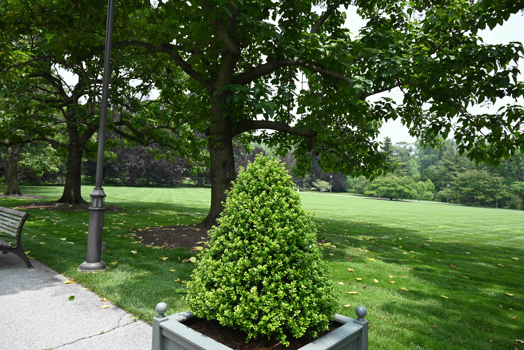

Describe this image?

-------Response--------
 This image shows a park with a large tree, a trimmed bush, and a bench. The park is well-maintained with green grass and a paved path.

In [29]:

# Load from local file

image = Image.load_from_file("test_image.jpg")

# Prepare contents
prompt = "Describe this image?"
contents = [image, prompt]

responses = multimodal_gemini_model.generate_content(contents, stream=True)

print("-------Prompt--------")
print_multimodal_prompt(contents)

print("\n-------Response--------")
for response in responses:
    print(response.text, end="")

Great response! Couldnt have described it better.

Lets try one from a url of an image.

-------Prompt--------


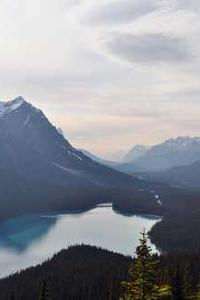

Describe the scene?

-------Response--------
 This is a beautiful landscape photo of a lake and mountains. The sky is cloudy and the water is calm. The mountains are covered in snow.

In [31]:
# Load image from Cloud Storage URI
image_url = ("https://fastly.picsum.photos/id/450/200/300.jpg?hmac=EAnz3Z3i5qXfaz54l0aegp_-5oN4HTwiZG828ZGD7GM")
image = load_image_from_url(image_url) # convert to bytes

# Prepare contents
prompt = "Describe the scene?"
contents = [image, prompt]

responses = multimodal_gemini_model.generate_content(contents, stream=True)

print("-------Prompt--------")
print_multimodal_prompt(contents)

print("\n-------Response--------")
for response in responses:
    print(response.text, end="")